In [1]:
import numpy as np
import glob
import os

from sklearn.model_selection import StratifiedKFold as skf
from dataset.hiragana import basic_hiragana_char
from dataset.katakana import basic_katakana_char

<p> If you would like to use hiragana only, you can comment any variable that related to ETL-1 </p>

In [2]:
ETL1_PATH = "dataset//ETL1C//IMG"
ETL8_PATH = "dataset//ETL8G//IMG"
ETL9_PATH = "dataset//ETL9B//IMG"

In [3]:
# Load All Image Path
ETL1_list = glob.glob(ETL1_PATH + "//*.png")
ETL8_list = glob.glob(ETL8_PATH + "//*.png")
ETL9_list = glob.glob(ETL9_PATH + "//*.png")

In [4]:
ETL9_list

['dataset//ETL9B//IMG\\0_あ-a_hira.png',
 'dataset//ETL9B//IMG\\10055232_あ-a_hira.png',
 'dataset//ETL9B//IMG\\10055279_い-i_hira.png',
 'dataset//ETL9B//IMG\\10055326_う-u_hira.png',
 'dataset//ETL9B//IMG\\10055373_え-e_hira.png',
 'dataset//ETL9B//IMG\\10055420_お-o_hira.png',
 'dataset//ETL9B//IMG\\10055467_か-ka_hira.png',
 'dataset//ETL9B//IMG\\10055560_き-ki_hira.png',
 'dataset//ETL9B//IMG\\10055653_く-ku_hira.png',
 'dataset//ETL9B//IMG\\10055746_け-ke_hira.png',
 'dataset//ETL9B//IMG\\10055839_こ-ko_hira.png',
 'dataset//ETL9B//IMG\\10055932_さ-sa_hira.png',
 'dataset//ETL9B//IMG\\10056025_し-shi_hira.png',
 'dataset//ETL9B//IMG\\10056118_す-su_hira.png',
 'dataset//ETL9B//IMG\\10056211_せ-se_hira.png',
 'dataset//ETL9B//IMG\\10056304_そ-so_hira.png',
 'dataset//ETL9B//IMG\\10056397_た-ta_hira.png',
 'dataset//ETL9B//IMG\\10056490_ち-chi_hira.png',
 'dataset//ETL9B//IMG\\10056583_つ-tsu_hira.png',
 'dataset//ETL9B//IMG\\10056676_て-te_hira.png',
 'dataset//ETL9B//IMG\\10056769_と-to_hira.png',
 '

In [5]:
# Make all image path became one list
dataset_paths = []
dataset_paths.extend(ETL1_list)
dataset_paths.extend(ETL8_list)
dataset_paths.extend(ETL9_list)
dataset_paths = np.asarray(dataset_paths)

In [6]:
# Make List of Label in One Array
japanese_character = []
japanese_character.extend(basic_hiragana_char)
japanese_character.extend(basic_katakana_char)

In [7]:
# Label total
len(japanese_character)

92

In [8]:
# Extracting Label from Files Name
print(ETL1_list[0].split("\\")[1].split("_")[1])
print(ETL8_list[0].split("\\")[1].split("_")[1])
print(ETL9_list[0].split("\\")[1].split("_")[1])

ケ-ke
あ-a
あ-a


In [9]:
# Extract Label

dataset_label = []
dataset_raw_label = []
for idx, string_path in enumerate(dataset_paths):
    label = string_path.split("\\")[1].split("_")[1]
    
    for idx1, chara in enumerate(japanese_character):
        #print(label, chara)
        if label == chara:
            dataset_label.append(idx1)
            dataset_raw_label.append(label)
            break
    
dataset_label = np.asarray(dataset_label)
dataset_raw_label = np.asarray(dataset_raw_label)

In [10]:
len(dataset_paths)

85791

In [11]:
# Test whether the labels is syncronized with the filename
print("Label {} with character {}".format(str(dataset_label[0]), japanese_character[dataset_label[0]]))
print("Label {} with character {}".format(str(dataset_label[10000]), japanese_character[dataset_label[10000]]))
print("Label {} with character {}".format(str(dataset_label[2000]), japanese_character[dataset_label[2000]]))
print("Label {} with character {}".format(str(dataset_label[1000]), japanese_character[dataset_label[1000]]))

print(dataset_paths[0])
print(dataset_paths[10000])
print(dataset_paths[2000])
print(dataset_paths[1000])

len(dataset_raw_label)

Label 54 with character ケ-ke
Label 67 with character ニ-ni
Label 62 with character チ-chi
Label 61 with character タ-ta
dataset//ETL1C//IMG\0_ケ-ke_kana.png
dataset//ETL1C//IMG\19000_ニ-ni_kana.png
dataset//ETL1C//IMG\11800_チ-chi_kana.png
dataset//ETL1C//IMG\10900_タ-ta_kana.png


85791

ケ-ke


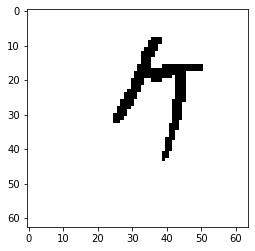

In [12]:
import cv2
import matplotlib.pyplot as plt

# Test the images and the label
image = cv2.imread(dataset_paths[0], cv2.COLOR_GRAY2RGB)
print(japanese_character[dataset_label[0]])
plt.imshow(image)

In [13]:
skf_model = skf(n_splits=4, random_state=10, shuffle=True)
for train_idx, test_idx in skf_model.split(dataset_paths, dataset_label):
    x_paths_train, y_train, y_train_raw = dataset_paths[train_idx] , dataset_label[train_idx], dataset_raw_label[train_idx]
    x_paths_test, y_test, y_test_raw = dataset_paths[test_idx] , dataset_label[test_idx], dataset_raw_label[test_idx]

In [14]:
# Find the unbalanced class

from collections import Counter

maximum = []
temp = y_train
counter = Counter(np.sort(temp))
for k, v in counter.items():
    per= v / len(temp) * 100
    maximum.append(v)
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

Class=0, n=271 (0.421%)
Class=1, n=271 (0.421%)
Class=2, n=272 (0.423%)
Class=3, n=271 (0.421%)
Class=4, n=272 (0.423%)
Class=5, n=271 (0.421%)
Class=6, n=272 (0.423%)
Class=7, n=271 (0.421%)
Class=8, n=272 (0.423%)
Class=9, n=272 (0.423%)
Class=10, n=271 (0.421%)
Class=11, n=272 (0.423%)
Class=12, n=271 (0.421%)
Class=13, n=272 (0.423%)
Class=14, n=271 (0.421%)
Class=15, n=272 (0.423%)
Class=16, n=271 (0.421%)
Class=17, n=272 (0.423%)
Class=18, n=271 (0.421%)
Class=19, n=272 (0.423%)
Class=20, n=271 (0.421%)
Class=21, n=272 (0.423%)
Class=22, n=271 (0.421%)
Class=23, n=272 (0.423%)
Class=24, n=271 (0.421%)
Class=25, n=272 (0.423%)
Class=26, n=271 (0.421%)
Class=27, n=272 (0.423%)
Class=28, n=271 (0.421%)
Class=29, n=272 (0.423%)
Class=30, n=271 (0.421%)
Class=31, n=272 (0.423%)
Class=32, n=271 (0.421%)
Class=33, n=272 (0.423%)
Class=34, n=272 (0.423%)
Class=35, n=271 (0.421%)
Class=36, n=272 (0.423%)
Class=37, n=271 (0.421%)
Class=38, n=272 (0.423%)
Class=39, n=271 (0.421%)
Class=40, 

In [15]:
# Create dictionary to mapping the classes

new_dict = {new_list: [] for new_list in range(2)}
maximum_class = max(maximum)

In [16]:
# Find how many augmentation are needed in order to achieve the most data
# This oversampling technique purpose is to balance the data ratio/distribution
for idx, label_sum in enumerate(maximum):
    if label_sum <= maximum_class:
        new_dict[0].append(idx)
        new_dict[1].append(round(maximum_class/label_sum))

In [17]:
# Validating the Cross validation
print("Path '{}' with label {}".format(x_paths_train[0], y_train[0]))

Path 'dataset//ETL1C//IMG\0_ケ-ke_kana.png' with label 54


Label 'ケ-ke'


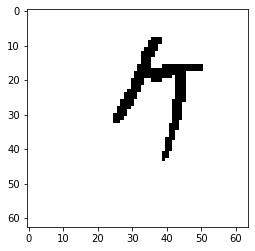

In [18]:
image = cv2.imread(x_paths_train[0], cv2.COLOR_GRAY2RGB)
plt.imshow(image)

print("Label '{}'".format(japanese_character[y_train[0]]))

In [19]:
import json

file = open("Utils/class_require_augment.json", "w")
json.dump(new_dict, file)
file.close()

In [20]:
# Save the filename and label to .npz
# The saved CV format will be used for preprocessing and data augmentation
np.savez("Utils/dataset_train.npz", x_path=x_paths_train, y_train=y_train, y_train_raw=y_train_raw)
np.savez("Utils/dataset_test.npz", x_path=x_paths_test, y_train=y_test, y_train_raw=y_test_raw)